# Manipulating images and stacks with Python

### Start
- Install Fiji
- Tested with Jupyterlab
- Incomplete list of package dependencies: scipy, skimage, numpy, matplotlib, seaborn, pandas, packaging, future

### References
- A good tutorial book on Python for science: https://mitpress.mit.edu/books/introduction-computation-and-programming-using-python-1

### contact
- Mark Histed

In [3]:
# setup: run this cell first
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from skimage import io
from skimage import transform, feature, exposure
import numpy as np
import scipy.ndimage as ndimage
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import os, sys
import subprocess as sp
import imp
import packaging; from packaging.version import Version

a_ = np.asarray
r_ = np.r_

## First concept: image data

## Read a tif file with python

- At the same time, load it in Fiji now.  Flip through the slices.  What are the dimensions?  Look at Image->Info.

In [1]:
fname = os.path.expanduser('~/Desktop/oristims.tif')
im = io.imread(fname, plugin='tifffile')

NameError: name 'os' is not defined

--------
### Fiji (ImageJ) exercises
- Image -> adjust -> Brightness/Contrast.  Lower max.
- Image -> Lookup tables.  Change color
- Make a duplicate of the stack (right-click on stack)
- Average intensity: Image -> Stacks -> Z-project
- Explore traces: select a cell in the stack.  Image-> Stacks -> Plot Z-Axis profile (Live on).


---- 

### An intro to data types can be useful; tutor should walk through the below

- Base python, Numpy, Pandas
- Namespaces
- Base
  - lists/tuples/dicts
  - http://www.diveintopython3.net/native-datatypes.html
- ndarray, dataframes (2d abstraction)
- key-value / dictionaries

### For students:   know what these Python things are before you start
- help, ?, web (stack overflow), python docs
- qtconsole, dir, tab completion


### Datatype example: what is a dict?

In [5]:
dict1 = { 'apples': [1,2,3], 'oranges': 2, 24: 'twenty-four'}

In [6]:
print(dict1)
print(dict1.keys())

dict1['apples']
dict1[24]

{'apples': [1, 2, 3], 'oranges': 2, 24: 'twenty-four'}
dict_keys(['apples', 'oranges', 24])


'twenty-four'

In [8]:
dict3 = { 'dfof': np.random.normal(size=[250,]),
         'cellsize': 10,
         'depth': 'g',
         'isPv': True }

In [ ]:
#print(dict3)
#dict3['depth']

if dict3['isPv']:
  plt.plot(dict3['dfof'], '.')
  plt.title(dict3['depth'])

# Image exercises start here

-----------

## 1. Size of data array.

#### Answer these questions.  Use a "Markdown cell" to describe your code results.  Can you make headings and lists yourself?
(You will probably want to have "scratch" cells, and then presentation cells to show your TA. It can be useful to have two different notebooks: one for working and one for "deliverables")

- Which dimensions are frames, cols, rows?
- nbytes, ravel: 
  - What do they do?
  - How does python treat nbytes and ravel differently?  (one is attribute, one is callable.  One in numpy namespace?  Attribute, or callable?  
- Compute number of pixels and number of bytes used by the image.  
- How many bytes are used per pixel?  
- What is the datatype of each pixel (Extra: what are possible image datatypes for pixels?)

- Flip through the stack.  Artifact frames?  Which are they?  What do they come from, do you think?  How would we drop them?

In [46]:
im.shape

(1920, 242, 256)

In [ ]:
# what will this print?
print(im.ndim)

In [38]:
len(im)

1920

## 1a. Remove artifact frames
- Look in Fiji.  Which frames show stim artifacts?
- Use a slice to remove those frames here.

Will look something like
````
removeframes = r_[x:y:z]
keepframes = np.setdiff1d(r_[:nfr], removeframes)
im = im[removeframes,:,:]

print(im.shape)
````

## 2. Displaying frames

Below displays one frame.

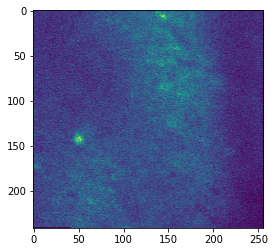

In [3]:
# first element of im[] is the frame variable
plt.imshow(im[2,:,:])

Do the below and answer each questions.  Present results in markdown cells.
- display other frames.
- How do you get the 'shape' of the array?  To plot an array, how many dimensions must it have?  How do you know the number of dimensions from the shape?  
- Can you display just one row?  (How many dimensions does that one row have?)
- Try different colormaps: gray?  inferno?  see categories and lightness here: https://matplotlib.org/tutorials/colors/colormaps.html.  Which is best for images?  Plot the two best for images and explain why they are best in a markdown cell.
- Extra credit: Create Fiji HiLo colormap https://stackoverflow.com/questions/44116995/how-to-achieve-the-fiji-hilo-colormap-in-matplotlib-image-plots-to-mark-under

### Display mean projection

Do:
- Do you see artifacts in the mean projection?  Zoom in on one cell.  Does it look completely round?  (Check the sd projection below too.)  What do they come from?  How would they be removed?
- Plot a colorbar next to your image

In [ ]:
# use im.mean() or np.mean(im) to take mean over the z axis.
# then use plt.imshow to display it
# compare to Z-project (mean) in ImageJ

### Display standard deviation projection

Do: same in ImageJ.  Does it look the same?



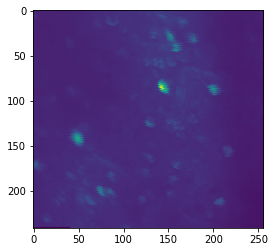

In [7]:
imsd = im.std(axis=0)
plt.imshow(imsd)

### Plot a single row intensity
Which dimension is which axis?  Rows vs cols?  Verify in ImageJ

### Now we will take a small section of the SD projection and work with it

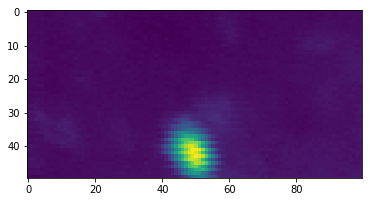

In [8]:
imsd2 = imsd[100:150,0:100]
plt.imshow(imsd2)


## Now, let's think about aligning scan rows.  

Work with the imsd2 matrix (subset of the standard deviation projection, showing one cell clearly)

- Plot 1-3 even rows, and one odd row.  (zoom on x or y axis as needed to see.  Plot dots to see if necessary)
- Is it possible to shift the odd row to make it match up?  (Hint: look at array indexing.  There's a spoiler below.  Don't read it until you've tried a bit yourself)
- Can you do the shift on all the odd rows and plot the whole thing?

Can you do the shift on the original imsd or original mean matrix?


------
#### semi-spoiler on array indexing follows - skip until you think about the alignment description above


image[begin:end:jump]

aka

image[start:stop:step]

In [ ]:
# semi-spoiler on array indexing - extract odd/even rows
gs = mpl.gridspec.GridSpec(2,2)

ax = plt.subplot(gs[0,0])
plt.imshow(imsd2[0::2,:]) # index even rows
plt.title('even rows')

ax = plt.subplot(gs[0,1])
plt.imshow(imsd2[1::2,:]) # index odd rows
plt.title('odd rows')

ax = plt.subplot(gs[1,0])
plt.imshow(imsd2[0::,:])  # index all rows
plt.title('all rows')


In [9]:
# semi-spoiler on array indexing
# Extract odd/even rows into two matrices, manipulate each, then put together into a matrix same size as orig
im1 = imsd2[0::2,:]  # if confused, look at the shape of imsd2, im1, im2
im2 = imsd2[1::2,:]

imout = np.zeros(imsd2.shape) # create new matrix - fill with empty/zero
imout[0::2] = im1 / im1.max() # put some rows back in
newOdd = im2**1
imout[1::2] = newOdd / newOdd.max()  

# plt.imshow(imout)

## 3. If you have your own data, work with it here.

### Load your own stack here and take a look in Python.  

- Plot one frame
- Plot mean
- Plot one row
- Plot multi-ROI images

- Is there movement?  If so, how would you correct?  Explain.

In [4]:
fname='/Users/MBLUser/Desktop/DATAMBL/Group3-JDS/001-onecell.tif'
im2 = io.imread(fname, plugin='tifffile')

--------

## 4. Advanced:
- Use ImageJ to make ROIs.  Export ROI *image* into Python (don't use Excel).  Use ROI image to generate traces in Python alone.  (Extra: can you make the ROI mask image in Python?)
- Can you do subpixel shifts to correct for bidir scanning shifts?
- Look for motion - can we use Python to align frames to mean?  Does this improve the mean?
- With GCamp traces: try deconvolution
  - https://github.com/j-friedrich/OASIS
  - https://github.com/flatironinstitute/CaImAn
 